In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [5]:
# 데이터베이스에 연결
conn = mysql.connector.connect(
    host="database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    user="eda_hb",
    password="hb",
    database="eda_project"
)

# 커서 생성
cursor = conn.cursor(buffered=True)

# 쿼리 실행
cursor.execute("SELECT * FROM match_data")

# 결과 가져오기
results = cursor.fetchall()

In [6]:
df = pd.DataFrame(results)

df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,KR_6878880250,100.0,사이다500ml,TOP,TOP,24.0,Jax,17.0,13.0,7.0,...,18.0,0.0,10.0,0.0,1,0,0.0,0,0,low
1,KR_6878880250,100.0,재수하는05,JUNGLE,JUNGLE,64.0,LeeSin,16.0,7.0,12.0,...,31.0,0.0,7.0,4.0,1,0,0.0,0,0,low
2,KR_6878880250,100.0,프랑말,MIDDLE,MIDDLE,20.0,Nunu,16.0,6.0,7.0,...,14.0,0.0,1.0,1.0,1,0,0.0,0,0,low
3,KR_6878880250,100.0,우우리,BOTTOM,BOTTOM,145.0,Kaisa,16.0,6.0,6.0,...,25.0,0.0,7.0,1.0,1,0,0.0,0,0,low
4,KR_6878880250,100.0,애LI 어른이LI,SUPPORT,BOTTOM,12.0,Alistar,14.0,0.0,11.0,...,65.0,0.0,29.0,8.0,1,0,0.0,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340165,KR_6726690488,200.0,피즈는 물귀신,TOP,NONE,164.0,Camille,11.0,2.0,3.0,...,1.0,0.0,1.0,0.0,0,0,NaN,0,0,high
340166,KR_6726690488,200.0,서렌안치면탑먹음,JUNGLE,NONE,141.0,Kayn,8.0,1.0,7.0,...,10.0,0.0,1.0,1.0,0,0,NaN,0,0,high
340167,KR_6726690488,200.0,용랴이,MIDDLE,NONE,517.0,Sylas,10.0,2.0,7.0,...,5.0,0.0,4.0,0.0,0,0,NaN,0,0,high
340168,KR_6726690488,200.0,타버릴 때까지,BOTTOM,NONE,202.0,Jhin,9.0,1.0,3.0,...,5.0,0.0,5.0,0.0,0,0,NaN,0,0,high


# Total vision score

In [7]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '1'")

re = cursor.fetchall()

In [8]:
win = pd.DataFrame(re)

win

,0
0,28.4328


In [9]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '0'")

re2 = cursor.fetchall()

In [10]:
lose = pd.DataFrame(re2)

lose

,0
0,25.3821


In [11]:
merge_vision = pd.concat([win,lose])

merge_vision = merge_vision.rename(columns={0 : '시야 점수'})

In [12]:
merge_vision = merge_vision.reset_index(drop=True)

In [13]:
merge_vision.index=['Win', 'Lose']

merge_vision = merge_vision.rename(columns={0 : '시야 점수'})

In [14]:
merge_vision

,시야 점수
Win,28.4328
Lose,25.3821


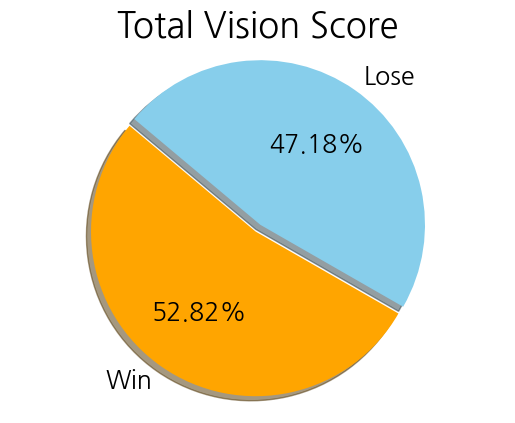

In [64]:
def custom_autopct(pct):
    # pct 값에 따라 반환할 문자열 포맷을 지정하고, fontsize를 조정합니다.
    return '{:.2f}%'.format(pct) if pct > 0 else ''


_, _, autotexts = plt.pie(merge_vision['시야 점수'], labels=merge_vision.index, textprops={'fontsize' :18}, autopct=lambda pct: custom_autopct(pct), startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)


# plt.pie(merge_vision['시야 점수'], labels=merge_vision.index, autopct=lambda pct: custom_autopct(pct),startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)


# 반환된 텍스트 객체들의 fontsize를 조정합니다.
for autotext in autotexts:
    autotext.set_fontsize(18)

plt.axis('equal')  # 원형으로 만들기
plt.title('Total Vision Score', fontsize=25)
plt.show()

# High Tier vision score

In [41]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '1' and ranking like 'high'")

high_vision = cursor.fetchall()

In [42]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '0' and ranking like 'high'")

low_vision = cursor.fetchall()

In [43]:
high_df = pd.DataFrame(high_vision)

high_df

,0
0,28.4718


In [44]:
low_df = pd.DataFrame(low_vision)

low_df

,0
0,25.4316


In [45]:
merge_vision = pd.concat([high_df,low_df])

merge_vision



,0
0,28.4718
0,25.4316


In [46]:
merge_vision = pd.concat([high_df,low_df])

merge_vision = merge_vision.rename(columns={0 : '시야 점수'})

merge_vision.index=['Win', 'Lose']

merge_vision

,시야 점수
Win,28.4718
Lose,25.4316


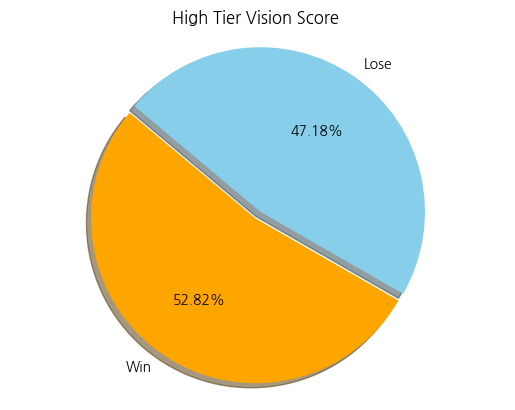

In [47]:
plt.pie(merge_vision['시야 점수'], labels=merge_vision.index, autopct='%1.2f%%', startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)
plt.axis('equal')  # 원형으로 만들기
plt.title('High Tier Vision Score ')
plt.show()

# Low Tier vision score

In [48]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '1' and ranking like 'low'")

high_vision2 = cursor.fetchall()

In [49]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '0' and ranking like 'low'")

low_vision2 = cursor.fetchall()

In [50]:
hv = pd.DataFrame(high_vision2)

lv = pd.DataFrame(low_vision2)

In [51]:
merge_vision2 = pd.concat([hv,lv])

merge_vision2 = merge_vision2.rename(columns={0 : '시야 점수'})

merge_vision2.index=['Win', 'Lose']

merge_vision2

,시야 점수
Win,28.3966
Lose,25.3361


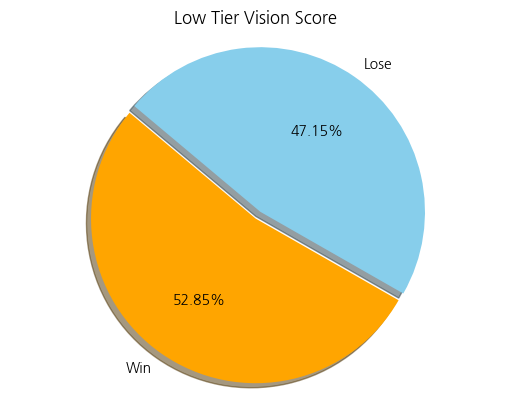

In [52]:
plt.pie(merge_vision2['시야 점수'], labels=merge_vision2.index, autopct='%1.2f%%', startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)
plt.axis('equal')  # 원형으로 만들기
plt.title('Low Tier Vision Score ')
plt.show()

In [53]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '1' and ranking like 'high'")

high_vision3 = cursor.fetchall()

In [54]:
cursor.execute("SELECT AVG(visionscore) from match_data where win like '0' and ranking like 'high'")

low_vision3 = cursor.fetchall()

In [55]:
hv2 = pd.DataFrame(high_vision3)

lv2 = pd.DataFrame(low_vision3)

In [56]:
merge_vision3 = pd.concat([hv2,lv2])

merge_vision3 = merge_vision3.rename(columns={0 : '시야 점수'})

merge_vision3.index=['Win', 'Lose']

merge_vision3

,시야 점수
Win,28.4718
Lose,25.4316


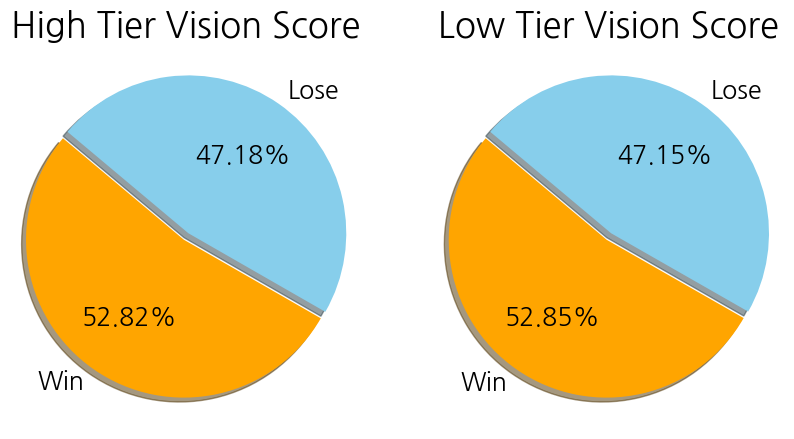

In [62]:
plt.figure(figsize=(10, 5))


# plt.subplot(1, 2, 1)
# plt.pie(merge_vision['시야 점수'], labels=merge_vision.index, autopct='%1.2f%%', startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)
# plt.axis('equal')  
# plt.title('Total Vision Score ')


plt.subplot(1, 2, 1)
_, _, autotexts = plt.pie(merge_vision3['시야 점수'], labels=merge_vision3.index,textprops={'fontsize' :18}, autopct=lambda pct: custom_autopct(pct), startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)
plt.axis('equal')  # 원형으로 만들기
plt.title('High Tier Vision Score', fontsize=25)

for autotext in autotexts:
    autotext.set_fontsize(18)

plt.subplot(1, 2, 2)
_, _, autotexts2 = plt.pie(merge_vision2['시야 점수'], labels=merge_vision2.index,textprops={'fontsize' :18}, autopct=lambda pct: custom_autopct(pct), startangle=140, colors=['orange', 'skyBlue'],explode=[0, 0.05], shadow=True)
plt.axis('equal')  # 원형으로 만들기
plt.title('Low Tier Vision Score', fontsize=25)

for autotext1 in autotexts2:
    autotext1.set_fontsize(18)

plt.show()